In [349]:
#Import different modules

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

from yellowbrick.classifier import ClassificationReport, ROCAUC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [350]:
# Read the data from the file and making dataframe from the csv file

data = pd.read_csv('concrete.csv')

### Exploratory data quality report

In [351]:
# Display the dataset along with the number of rows and columns

print('Shape of the data:',data.shape,'\n') # Displays the dimension of the dataframe

display(data.head())

print('\n\nThe number of rows in the file are ', data.shape[0])
print('\n\nThe number of columns in the file are ', data.shape[1])

Shape of the data: (1030, 9) 



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29




The number of rows in the file are  1030


The number of columns in the file are  9


In [352]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Note:

All the columns are float except 'age' which is int.

`Target variable 'strength' is a continuous variable and is required to changed as categorical variable for classifiers.`

### Attribute Information
    
   #### Input Variables:

    Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
    
    Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
    
    Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
    
    Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable

    Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
    
    Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable

    Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
    
    Age(age) -- quantitative -- Day (1~365) -- Input Variable

   #### Output Variable:
    
    Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [353]:
# Check for the null or na values in the dataset

if(data.isnull().any().any()):
    print('There are null or nan values in the dataset')
print('There are no null or nan values in the dataset')    

# Check the number of uniques entries for each column

print('\nNumber of unique entries in each columns are: ')
data.nunique()

There are no null or nan values in the dataset

Number of unique entries in each columns are: 


cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [354]:
# Description of the attributes
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.17,104.51,102.00,192.38,272.90,350.00,540.0
slag,1030.0,73.90,86.28,0.00,0.00,22.00,142.95,359.4
ash,1030.0,54.19,64.00,0.00,0.00,0.00,118.30,200.1
water,1030.0,181.57,21.35,121.80,164.90,185.00,192.00,247.0
superplastic,1030.0,6.20,5.97,0.00,0.00,6.40,10.20,32.2
coarseagg,1030.0,972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
fineagg,1030.0,773.58,80.18,594.00,730.95,779.50,824.00,992.6
age,1030.0,45.66,63.17,1.00,7.00,28.00,56.00,365.0
strength,1030.0,35.82,16.71,2.33,23.71,34.44,46.14,82.6


### Visualing the variables

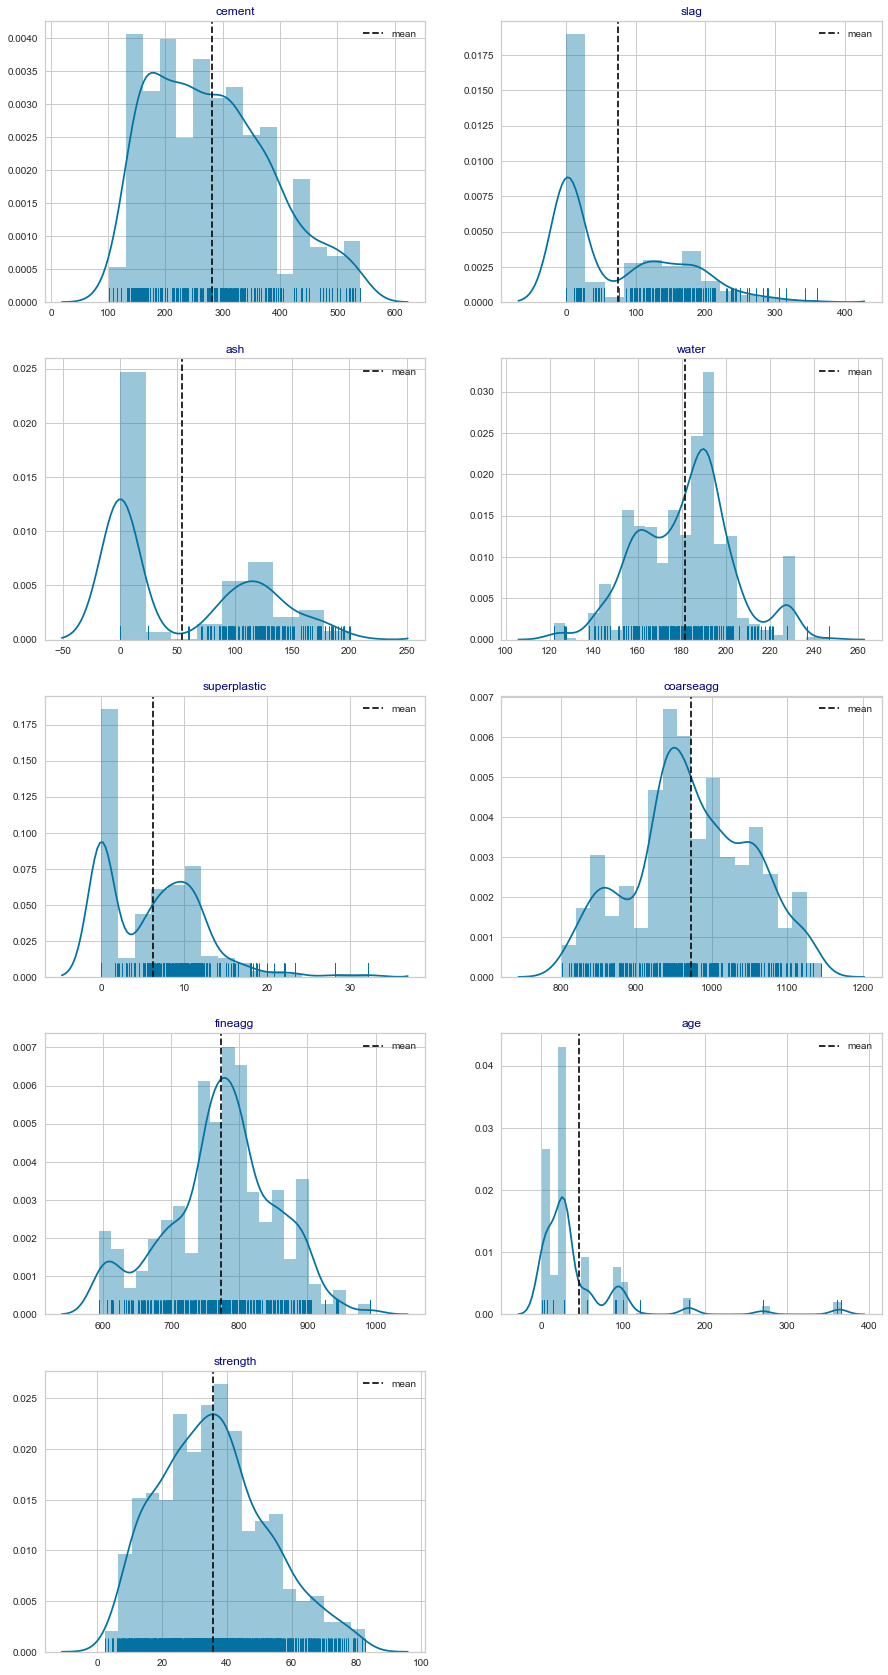

In [355]:
arr = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize = (15,30))
pos = 1
for i in arr:
    plt.subplot(5,2,pos)
    sns.distplot(data[i], rug = True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")
    pos +=1
plt.show()

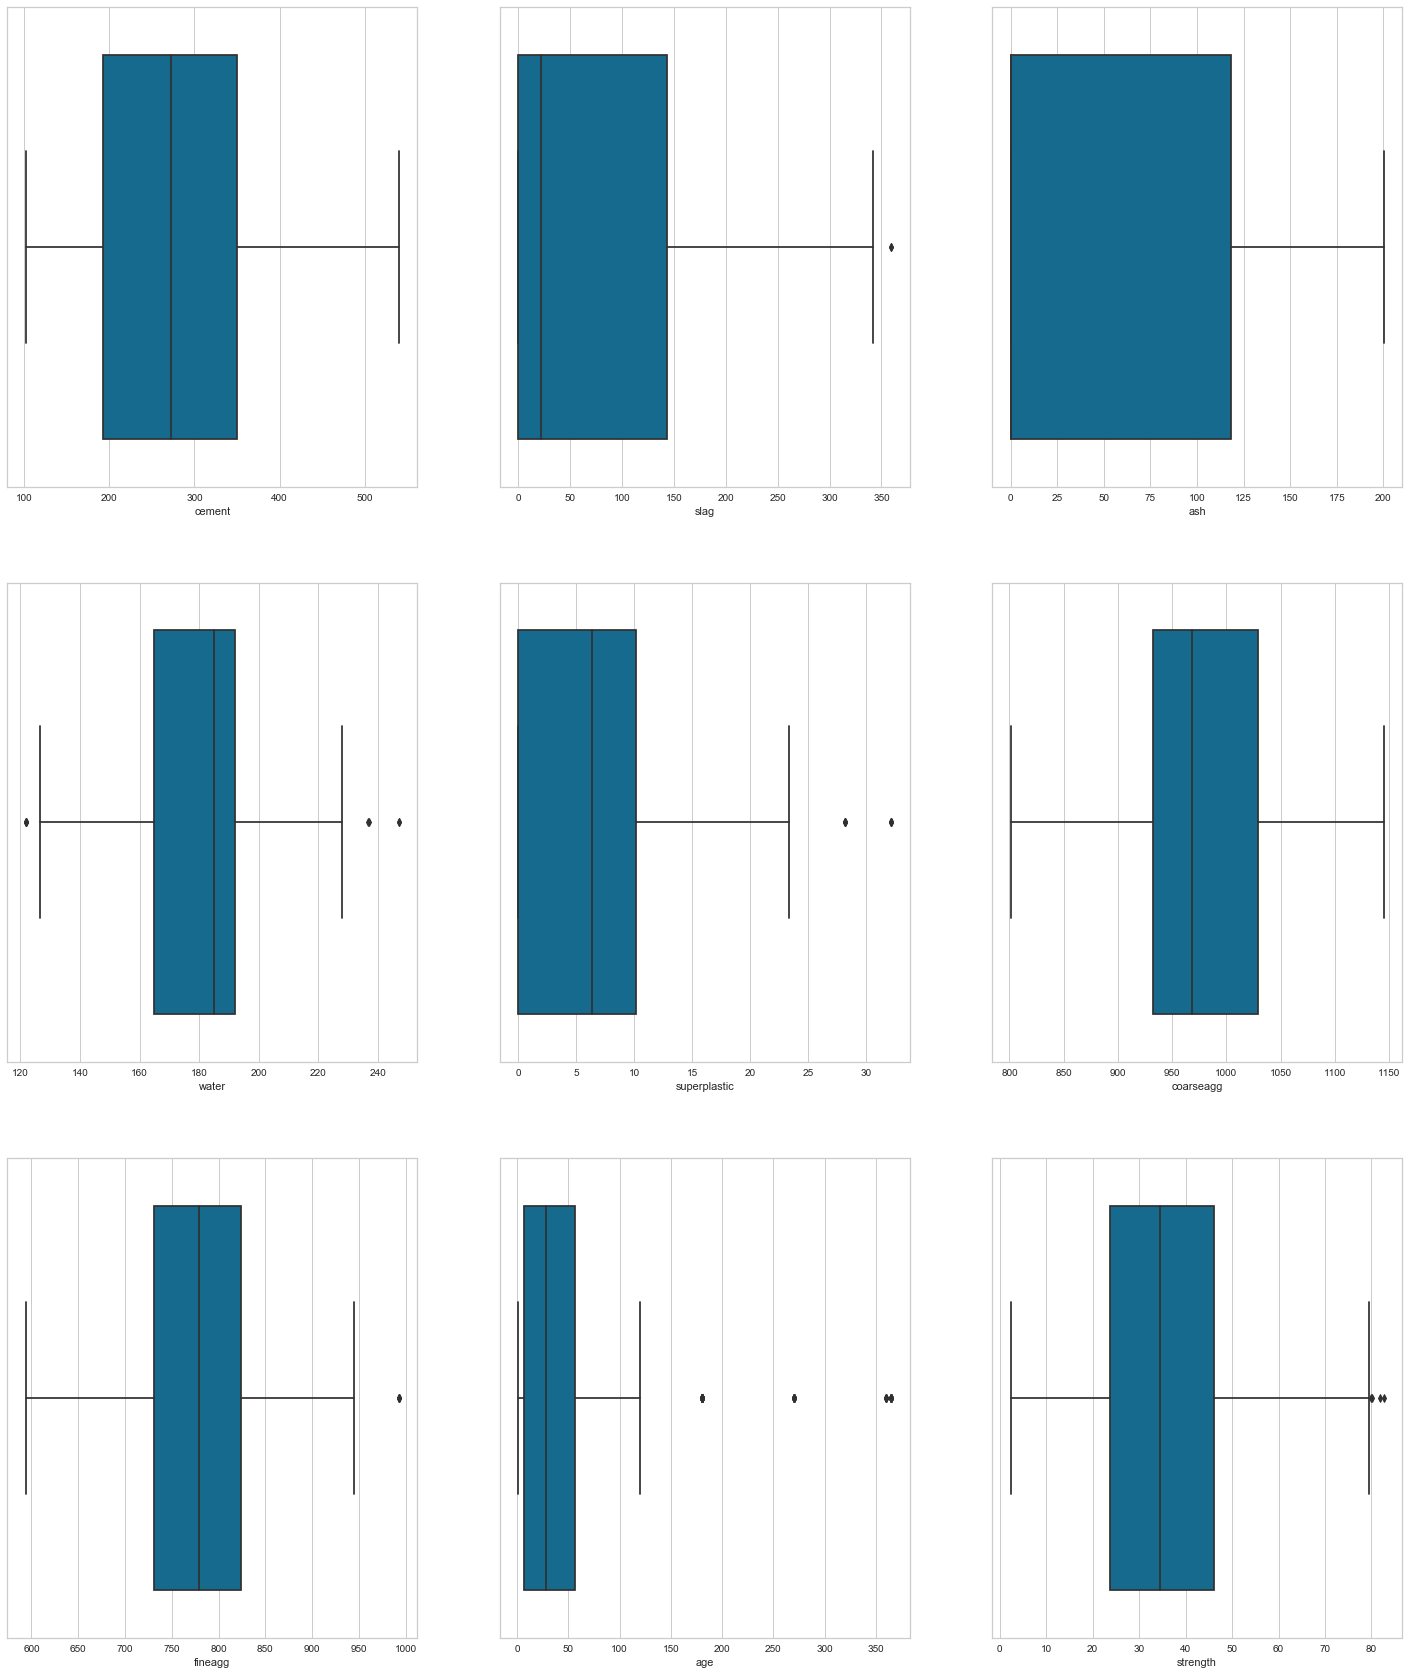

In [356]:
arr = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize = (25,30))
pos = 1
for i in arr:
    plt.subplot(3,3,pos)
    sns.boxplot(data[i])
    pos +=1
plt.show()

In [357]:
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

### Visualizing the data with bivariate plots

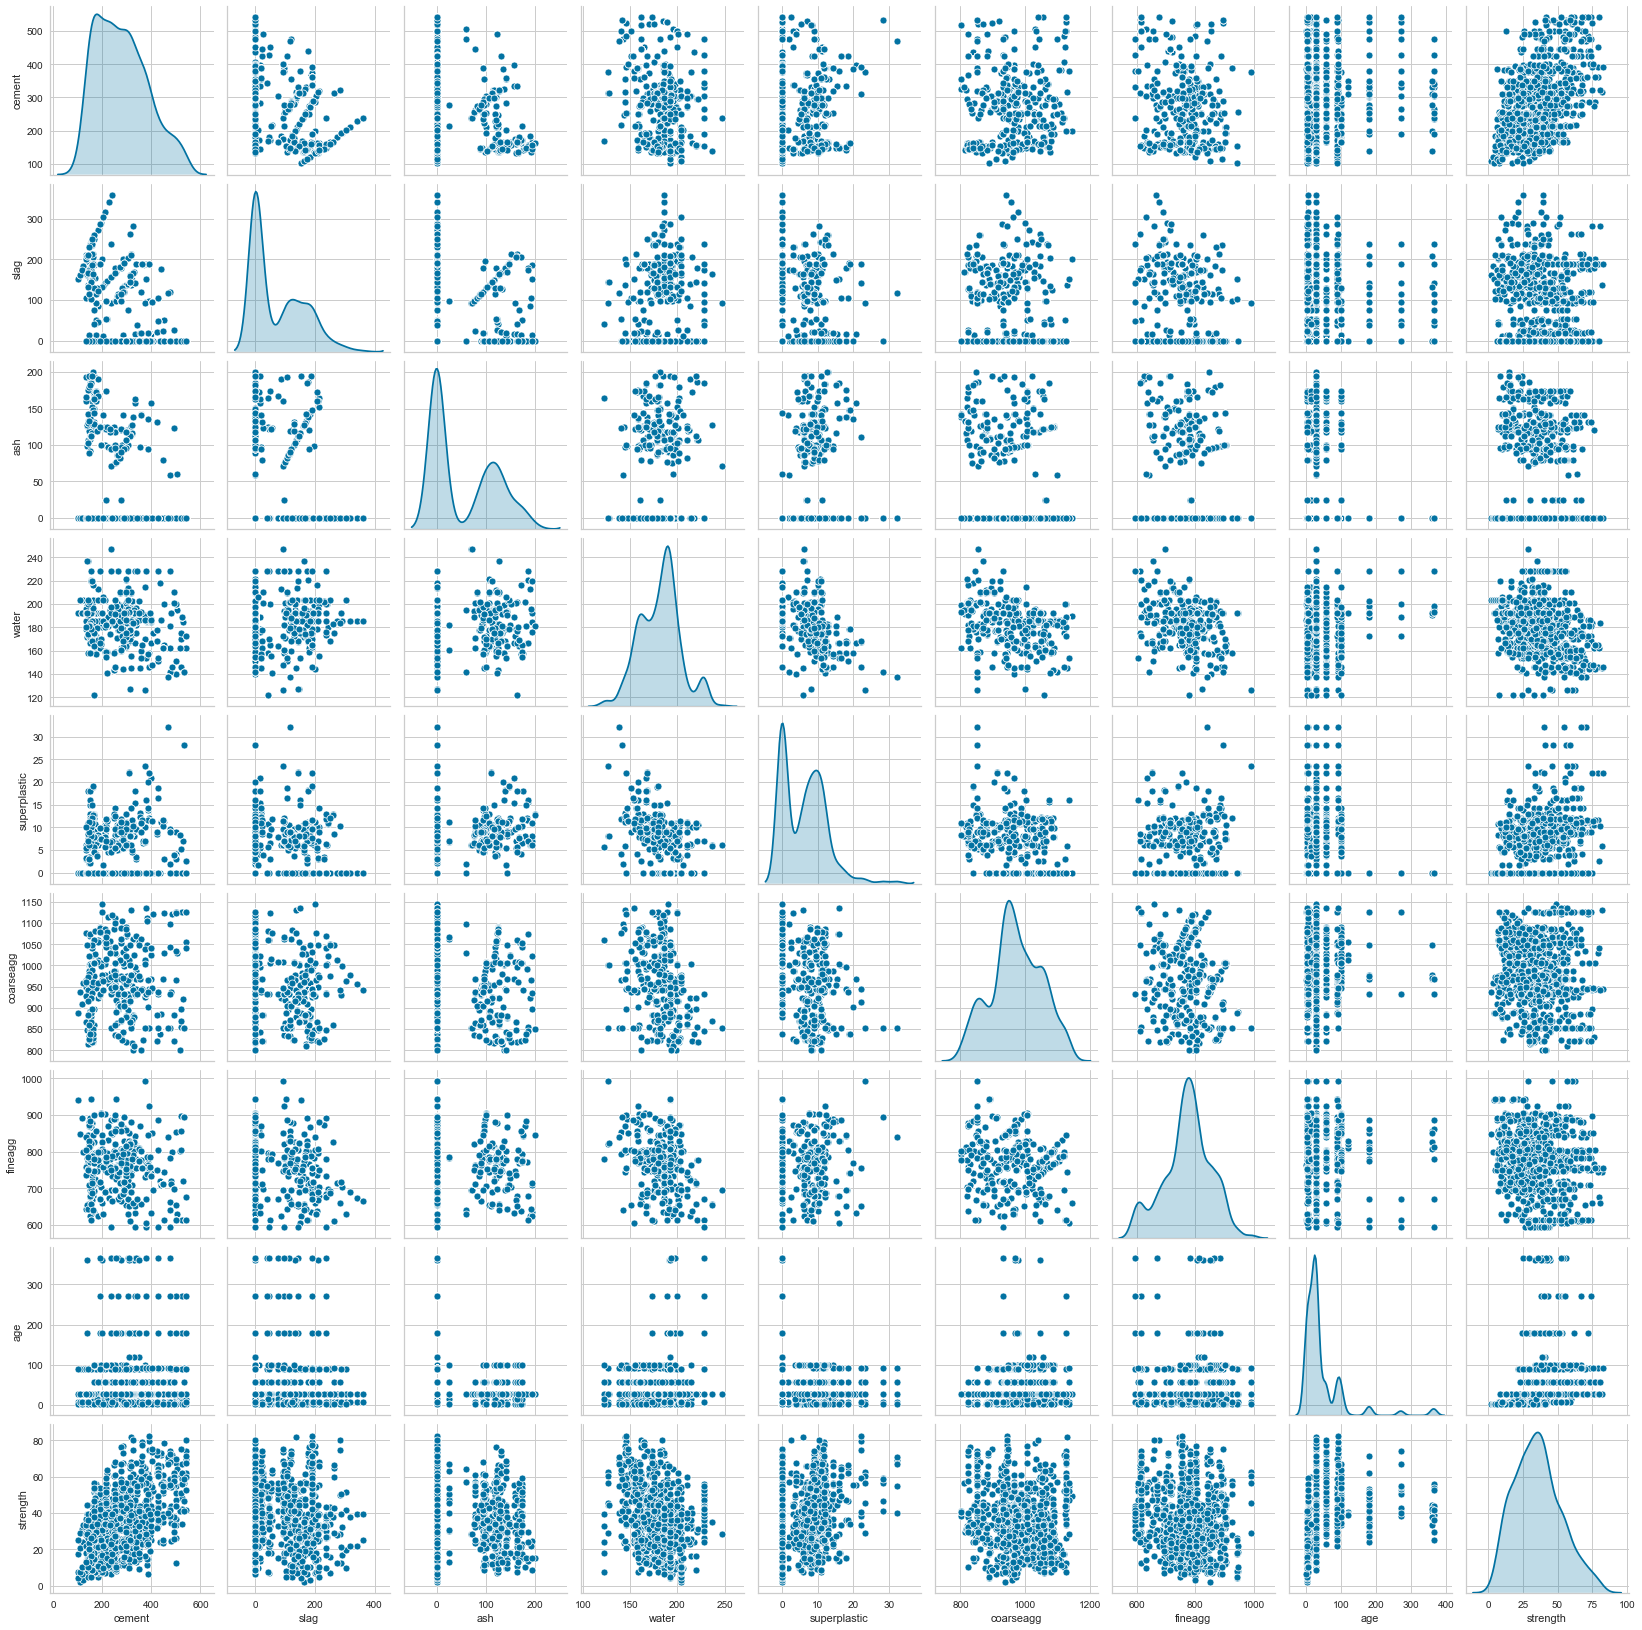

In [358]:
sns.pairplot(data, diag_kind='kde')
plt.show()

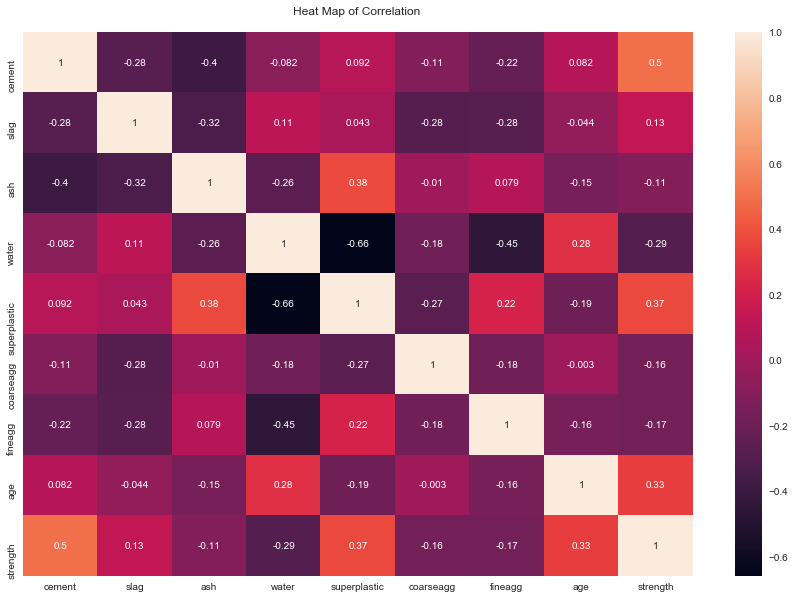

In [359]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

plt.title('Heat Map of Correlation \n')
cor = data.corr()
sns.heatmap(cor,annot = True)
plt.show()

### Notes

   1. Variable 'slag, ash, superplastic' have minimum values as '0'. This is a possibility - thus no treatment conducted. 
   2. Minimum for variable 'age' can be '1' day and a max. of '365' days.  
   3. Variable 'age' is comparitively highly skewed against the other variables.
   4. Variables 'slag, ash, water, superplastic, coarseagg, fineagg, age' have multiple peaks/gaussians.
   5. Variables 'slag, water, superplastic, fineagg, age, strength' have outliers. 
   6. Even though there are '0' values to the input variables which are possibility, there are no null or nan or missing value inputs. 
   
### Binning the data variables to observe any developing trends towards the attribute strength:
    1. Cement
    2. Slag
    3. Ash
    4. Water
    5. Superplastic
    6. Coarseagg
    7. Fineagg
    8. Age
    9. Strength

In [360]:
d1 = data.copy() # working on the copy of the data.

In [361]:
def cat(d1):
    if d1['cement'] <= 192.38:
        return '1'
    if d1['cement'] > 192.38 and d1['cement'] <= 272.9:
        return '2'
    if d1['cement'] > 272.9 and d1['cement'] <= 350:
        return '3'
    if d1['cement'] > 350:
        return '4'
d1['cement_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['slag'] <= 22:
        return 'Low'
    if d1['slag'] > 22 and d1['slag'] <= 142.95:
        return 'Medium'
    if d1['slag'] > 142.95:
        return 'High'
d1['slag_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['ash'] <= 118.3:
        return 'Low'
    if d1['ash'] > 118.3:
        return 'High'
d1['ash_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['water'] <= 164.9:
        return '1'
    if d1['water'] > 164.9 and d1['water'] <= 185:
        return '2'
    if d1['water'] > 185 and d1['water'] <= 192:
        return '3'
    if d1['water'] > 192:
        return '4'
d1['water_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['superplastic'] <= 6.4:
        return 'Low'
    if d1['superplastic'] > 6.4 and d1['superplastic'] <= 10.2:
        return 'Medium'
    if d1['superplastic'] > 10.2:
        return 'High'
d1['superplastic_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['coarseagg'] <= 932:
        return '1'
    if d1['coarseagg'] > 932 and d1['coarseagg'] <= 968:
        return '2'
    if d1['coarseagg'] > 968 and d1['coarseagg'] <= 1029.4:
        return '3'
    if d1['coarseagg'] > 1029.4:
        return '4'
d1['coarseagg_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['fineagg'] <= 730.95:
        return '1'
    if d1['fineagg'] > 730.95 and d1['fineagg'] <= 779.5:
        return '2'
    if d1['fineagg'] > 779.5 and d1['fineagg'] <= 824:
        return '3'
    if d1['fineagg'] > 824:
        return '4'
d1['fineagg_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['age'] <= 30:
        return 'Less than 1 month'
    if d1['age'] > 30 and d1['age'] <= 90:
        return '2-3 months'
    if d1['age'] > 90:
        return 'More than 3 months'
d1['age_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['strength'] <= 23.71:
        return '1'
    if d1['strength'] > 23.71 and d1['strength'] <= 34.44:
        return '2'
    if d1['strength'] > 34.44 and d1['strength'] <= 46.14:
        return '3'
    if d1['strength'] > 46.14:
        return '4'
d1['strength_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)

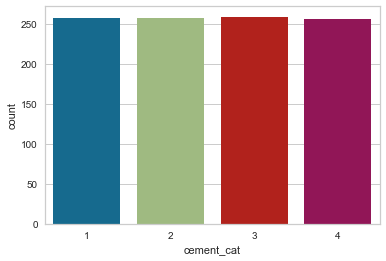

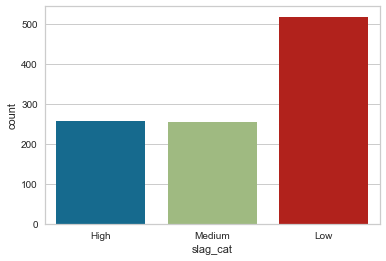

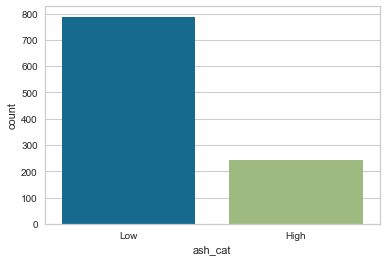

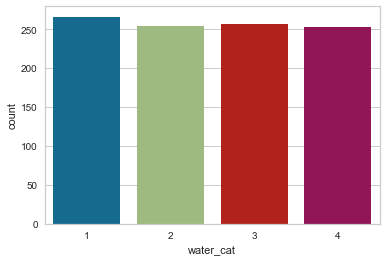

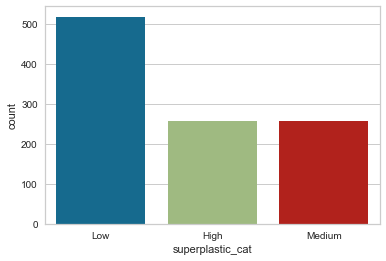

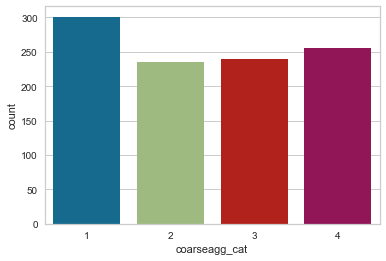

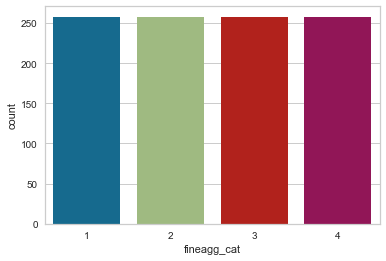

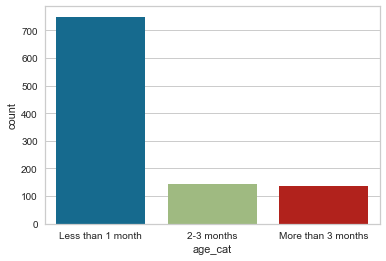

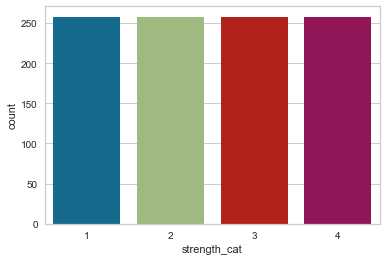

In [362]:
for i in ['cement_cat', 'slag_cat', 'ash_cat', 'water_cat', 'superplastic_cat', 'coarseagg_cat', 'fineagg_cat', 'age_cat', 'strength_cat']:
    sns.countplot(d1[i])
    plt.show()

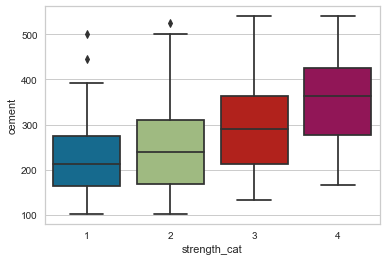

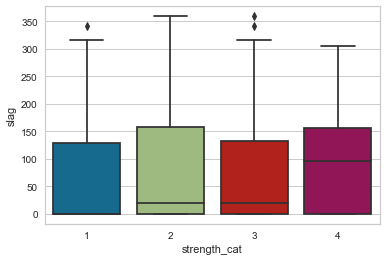

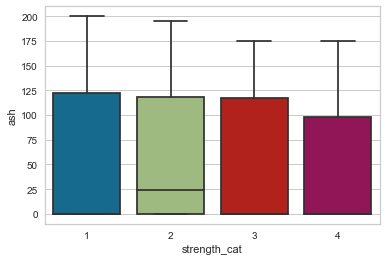

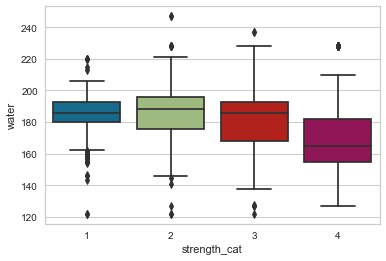

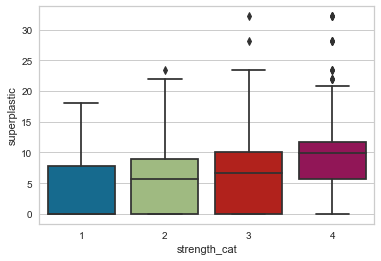

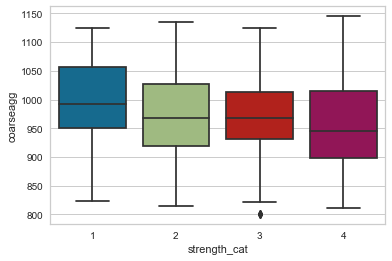

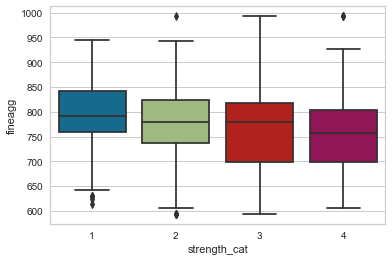

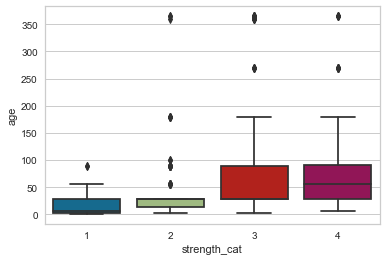

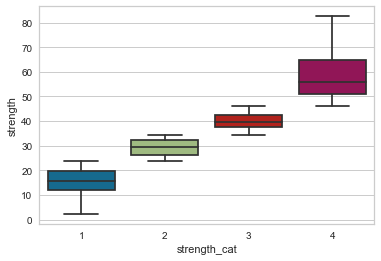

In [363]:
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.boxplot(x = 'strength_cat', y =i, data = d1)
    plt.show()

### Notes: 

Binning gives a similarly distributed datasets for the categorical variable of 'strength'

From the box plots the following inferences can be generalized:
1. There are outliers even after binning and can be treated. 
2. Increase in strength is observed with the increasing mean cement quantiy.
3. For the low strength category, the range of water content used is very high as there are lot of outliers. 
4. Reduction in mean water content can be seen for the higher strength category. 
5. Increasing mean Superplasticizer content is visible for the higher strength category.
6. With an increased mean age, the strength is seen to increase.

### Notes:

#### Though the binning is not necessary for all the variables for the model preparation - only binned data used was of the strength which had 4 categories.

#### No features are dropped or treated and preparing the data model.

#### Spliting the data

In [364]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

print(X.shape, y.shape)

(1030, 8) (1030,)


In [365]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


#### The following models were applied on the dataset: 

    1. Linear Regression
    2. Polynomial Regression
    3. Logistic Regression
    4. Decission Tree Classifier
    5. Random Forest Classifier
    6. Ada Boost Classifier
    7. Gradient Boost Classifier
    8. K-Nearest Neighbor Classifier

The KFold and Gridsearch Cross Validation is applied for Decision Tree, Random Forest and K-nearest neighbor classifier. 

#### `Metrics considered is the Accuracy of the model on the training/validation dataset and its performance on the testing dataset for predicting the (True Positives) correct concrete strength falling in the correct category. `

### Linear Regression

In [366]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {:2f}".format(col_name, lin_model.coef_[idx]))

intercept = lin_model.intercept_
print("The intercept for model is %.4f" % intercept)

lin_train_acc = lin_model.score(X_train, y_train).round(4)
lin_val_acc = lin_model.score(X_val, y_val).round(4)
lin_test_acc = lin_model.score(X_test, y_test).round(4)

print()
print('Score on Training set: %.4f' % (lin_train_acc*100))
print('Score on Validation set: %.4f' % (lin_val_acc*100))
print('Score on Test set: %.4f' % (lin_test_acc*100))

The coefficient for cement is 0.006929
The coefficient for slag is 0.006075
The coefficient for ash is 0.004865
The coefficient for water is -0.008054
The coefficient for superplastic is 0.024819
The coefficient for coarseagg is 0.001024
The coefficient for fineagg is 0.000608
The coefficient for age is 0.008258
The intercept for model is -0.7157

Score on Training set: 53.9000
Score on Validation set: 51.9500
Score on Test set: 55.4600


In [367]:
#Store the accuracy results for each model in a dataframe for final comparison

resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Training Accuracy': lin_train_acc, 
                          'Validation Accuracy': lin_val_acc, 'Test Accuracy':lin_test_acc})

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.52,0.555


### Polynomial Regression

In [368]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
X_val2 = poly.fit_transform(X_val)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

poly_train_acc = poly_clf.score(X_train2, y_train).round(4)
poly_val_acc = poly_clf.score(X_val2, y_val).round(4)
poly_test_acc = poly_clf.score(X_test2, y_test).round(4)


print('Score on training set: ', (poly_train_acc*100))
print('Score on validation set: ',(poly_val_acc*100))
print('Score on test set: ',(poly_test_acc*100))

Score on training set:  46.63
Score on validation set:  11.42
Score on test set:  36.26


#### `With higher order polynomial regression, the accuracy score is decreasing so the linear model should be kept simple.`

In [369]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Polynomial Linear Regression'], 'Training Accuracy': poly_train_acc, 
                          'Validation Accuracy': poly_val_acc, 'Test Accuracy':poly_test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363


### Logitic Regression

In [370]:
model_log = LogisticRegression(random_state=7)

model_log.fit(X_train, y_train)

y_predict_log = model_log.predict(X_test)  

train_score = model_log.score(X_train,y_train)
val_score = model_log.score(X_val, y_val)
test_score = model_log.score(X_test, y_test)

print(train_score, val_score, test_score)

0.6407407407407407 0.6132596685082873 0.6407766990291263


In [371]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Training Accuracy': train_score, 
                          'Validation Accuracy': val_score, 'Test Accuracy':test_score})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641


### Decision Tree Classifier

In [372]:
dt_model = DecisionTreeClassifier(random_state = 7)

dt_model.fit(X_train, y_train)    

train_acc = dt_model.score(X_train, y_train).round(4) 
val_acc = dt_model.score(X_val, y_val).round(4)
test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, val_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9926 0.6685 0.6958
Total Nodes: 267
Depth: 13
Total Leaves: 134



#### The model is over-fit to the training data set and needs pruning to limit it. 

In [373]:
## Checking the feature importances
feature_cols = X_train.columns

feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dt_model.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')

feat_imp.sort_values(by=0, ascending=False)

,0
age,0.250480
cement,0.179940
water,0.144554
fineagg,0.138715
coarseagg,0.102556
superplastic,0.069206
slag,0.060448
ash,0.054100


#### `All the attributes have importance in the model.`

In [374]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696


#### Spliting the data

In [375]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


### Kfold Cross Validation 

In [376]:
# 4 splits give each fold a 25% of data which is taken for validation
kfold_dt = KFold(n_splits = 4, random_state = 7, shuffle=True) 

results_dt = cross_val_score(dt_model, X_train, y_train, cv=kfold_dt)

results_test_dt = cross_val_score(dt_model, X_test, y_test, cv=kfold_dt)

print(results_dt)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_dt.mean()*100.0, results_dt.std()*100.0))
print()
print(results_test_dt)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_dt.mean()*100.0, results_test_dt.std()*100.0))

[0.66850829 0.67777778 0.73333333 0.71111111]

Training Accuracy Mean: 69.768% Standard Deviation:(2.597%)

[0.61538462 0.63636364 0.57142857 0.5974026 ]

Testing Accuracy Mean: 60.514% Standard Deviation:(2.385%)


In [377]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier-KFold'], 'Training Accuracy': results_dt.mean(),
                              'Test Accuracy': results_test_dt.mean()})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605


### Grid Search

In [378]:
dt_model.get_params() # getting the decissiontree classifier model paramters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 7,
 'splitter': 'best'}

In [379]:
# giving the model parameters the values for trials:
param_grid = {'criterion': ('gini','entropy'),'splitter': ('best','random'),
              'max_depth':(1,3,6,8,10,14),'max_leaf_nodes':(50,75,100,150,200,250)}

In [380]:
# 4 splits give each fold a 25% of data which is taken for validation

split = 4 

gs = GridSearchCV(dt_model, param_grid, cv = split)

gs.fit(X_train,y_train)

print('The best parameter configuration is:', gs.best_params_)
print('The best score:',gs.best_score_)

The best parameter configuration is: {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 150, 'splitter': 'best'}
The best score: 0.7087400245549418


#### Training dataset accuracy is for 4 splits is 70.874% with best parameter configuration as: {'criterion': 'entropy', 'max_depth': 14, 'max_leaf_nodes': 150, 'splitter': 'best'}

In [381]:
dt_model = DecisionTreeClassifier(random_state = 7, criterion = 'entropy', max_depth = 14, max_leaf_nodes = 150,
                                  splitter = 'best')
    
dt_model.fit(X_train, y_train)

train_acc = dt_model.score(X_train, y_train).round(4) 

test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.982 0.7896
Total Nodes: 299
Depth: 14
Total Leaves: 150



In [382]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier after GridSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790


### Randomized Search 

In [383]:
# giving the model parameters the values for trials:

param_dist = {'criterion': ('gini','entropy'),
              'splitter': ('best','random'),
              'max_depth':(1,3,6,8,10,14),
              'max_leaf_nodes':(50,75,100,150,200,250)}

In [384]:
dt_model = DecisionTreeClassifier()

randomCV = RandomizedSearchCV(dt_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print('The best parameters are: ',randomCV.best_params_)
print()
print('The best score: ',randomCV.best_score_)

The best parameters are:  {'splitter': 'best', 'max_leaf_nodes': 50, 'max_depth': 8, 'criterion': 'gini'}

The best score:  0.6795498084291187


In [385]:
dt_model = DecisionTreeClassifier(random_state = 7, criterion = 'gini', max_depth = 14, max_leaf_nodes = 200,
                                  splitter = 'best')
dt_model.fit(X_train, y_train)

train_acc = dt_model.score(X_train, y_train).round(4) 

test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9931 0.7896
Total Nodes: 317
Depth: 13
Total Leaves: 159



In [386]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier after RandomizedSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790


### Random Forest Classifier

#### Spliting the data

In [387]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [388]:
RFC_model = RandomForestClassifier(random_state=7)

RFC_model.fit(X_train, y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

val_acc = RFC_model.score(X_val, y_val).round(4)

test_acc = RFC_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.9926
Validation set score: 0.7017
Test set score: 0.7476


In [389]:
## Checking the feature importances
feature_cols = X_train.columns

feat_importance = RFC_model.feature_importances_

feat_imp_dict = dict(zip(feature_cols, RFC_model.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')

feat_imp.sort_values(by=0, ascending=False)

,0
age,0.277778
cement,0.152113
water,0.127707
fineagg,0.110961
coarseagg,0.098850
superplastic,0.093837
slag,0.074283
ash,0.064471


In [390]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748


### Kfold Cross Validation 

#### Spliting the data

In [391]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [392]:
num = 4
seed = 7

kfold_RFC = KFold(n_splits=num, random_state=seed, shuffle=True)

results_RFC = cross_val_score(RFC_model, X_train, y_train, cv=kfold_RFC)

results_test_RFC = cross_val_score(RFC_model, X_test, y_test, cv=kfold_RFC)


print(results_RFC)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_RFC.mean()*100.0, results_RFC.std()*100.0))
print()
print(results_test_RFC)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_RFC.mean()*100.0, results_test_RFC.std()*100.0))

[0.67955801 0.73333333 0.75555556 0.72222222]

Training Accuracy Mean: 72.267% Standard Deviation:(2.763%)

[0.56410256 0.72727273 0.64935065 0.68831169]

Testing Accuracy Mean: 65.726% Standard Deviation:(6.043%)


In [393]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier-KFold'], 'Training Accuracy': results_RFC.mean(),
                             'Test Accuracy': results_test_RFC.mean()})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657


### Grid Search

In [394]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [395]:
param_grid = {'n_estimators': (50,100,150,200),'max_depth': (10,20),'max_features': (6, 8), 'criterion':('gini','entropy')}

In [396]:
gs = GridSearchCV(RFC_model, param_grid, cv = 4)

gs.fit(X_train,y_train)

print('The best parameter configuration is: ', gs.best_params_)
print('The best score: ',gs.best_score_)

The best parameter configuration is:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'n_estimators': 200}
The best score:  0.7711249232658073


#### Highest accuracy is 77.112% with best parameters configuration as:{'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'n_estimators': 200}

In [397]:
RFC_model = RandomForestClassifier(random_state = 7, criterion = 'gini', max_depth = 10, max_features = 6, n_estimators = 200) 
    
RFC_model.fit(X_train, y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

test_acc = RFC_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  

print("Test set score: %.4f" % test_acc)

Train set score: 0.9875
Test set score: 0.7929


In [398]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier - GridSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### Randomized Search 

In [399]:
# giving the model parameters the values for trials:

param_dist = {'n_estimators': (50,100,150,200),
              'max_depth': (10,20),
              'max_features': (6, 8),
              'criterion':('gini','entropy'),
              'class_weight':('balanced','balanced_subsample')}

In [400]:
RFC_model = RandomForestClassifier()

randomCV = RandomizedSearchCV(RFC_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print(randomCV.best_params_)

print('The best score: ',randomCV.best_score_)

{'n_estimators': 150, 'max_features': 6, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
The best score:  0.7627777777777778


In [401]:
RFC_model = RandomForestClassifier(random_state = 7, criterion = 'entropy', max_depth = 20, max_features = 8, 
                                   n_estimators = 100, class_weight = 'balanced')
    
RFC_model.fit(X_train,y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

test_acc = RFC_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9931 0.7929
Total Nodes: 317
Depth: 13
Total Leaves: 159



In [402]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['RandomForestClassifier - RandomizedSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### AdaBoost

#### Spliting the data

In [403]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [404]:
AD_model = AdaBoostClassifier(random_state=7)

AD_model.fit(X_train, y_train)

train_acc = AD_model.score(X_train, y_train).round(4) 
val_acc = AD_model.score(X_val, y_val).round(4)
test_acc = AD_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.6648
Validation set score: 0.6077
Test set score: 0.5858


In [405]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['AdaBoost Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})
resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### Gradient Boosting

In [406]:
GB_model = GradientBoostingClassifier(random_state=7)

GB_model.fit(X_train, y_train)

train_acc = GB_model.score(X_train, y_train).round(4) 
val_acc = GB_model.score(X_val, y_val).round(4)
test_acc = GB_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.9852
Validation set score: 0.6575
Test set score: 0.7476


In [407]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### K-Nearest Neighbors

In [408]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

train_acc = knn_model.score(X_train, y_train).round(4) 
val_acc = knn_model.score(X_val, y_val).round(4)
test_acc = knn_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.7241
Validation set score: 0.5801
Test set score: 0.5890


In [409]:
tempresultsDf = pd.DataFrame({'Method':['KNN'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### Kfold Cross Validation 

#### Spliting the data

In [410]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [411]:
num = 4
seed = 7

kfold_knn = KFold(n_splits = num, random_state = seed, shuffle=True)

results_knn = cross_val_score(knn_model, X_train, y_train, cv = kfold_knn)

results_test_knn = cross_val_score(knn_model, X_test, y_test, cv = kfold_knn)

print(results_knn)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_knn.mean()*100.0, results_knn.std()*100.0))
print()
print(results_test_knn)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_knn.mean()*100.0, results_test_knn.std()*100.0))

[0.5801105  0.53333333 0.60555556 0.57777778]

Training Accuracy Mean: 57.419% Standard Deviation:(2.599%)

[0.42307692 0.50649351 0.44155844 0.50649351]

Testing Accuracy Mean: 46.941% Standard Deviation:(3.766%)


In [412]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN-KFold'], 'Training Accuracy': results_knn.mean(),
                              'Test Accuracy': results_test_knn.mean()})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### Grid Search

In [413]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [414]:
param_grid = {'n_neighbors': list(range(1,9)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [415]:
gs = GridSearchCV(knn_model, param_grid, cv = 4)

gs.fit(X_train,y_train)

print('The best parameter configuration is: ', gs.best_params_)
print('The best score: ',gs.best_score_)

The best parameter configuration is:  {'algorithm': 'auto', 'n_neighbors': 1}
The best score:  0.6199739103744628


#### Highest accuracy is 61.997% with best parameters configuration as: {'algorithm': 'auto', 'n_neighbors': 1}

In [416]:
knn_model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto') 
                                   
knn_model.fit(X_train, y_train)
  
train_acc = knn_model.score(X_train, y_train).round(4) 

test_acc = knn_model.score(X_test, y_test).round(4)


print("Train set score: %.4f" % train_acc)  
print("Test set score: %.4f" % test_acc)

Train set score: 0.9917
Test set score: 0.6602


In [417]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN - GridSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


### Randomized Search 

In [418]:
# giving the model parameters the values for trials:
param_dist = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [419]:
knn_model = KNeighborsClassifier()

randomCV = RandomizedSearchCV(knn_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print(randomCV.best_params_)

print('The best score: ',randomCV.best_score_)

{'n_neighbors': 1, 'algorithm': 'brute'}
The best score:  0.6171551724137931


In [420]:
knn_model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'auto')

knn_model.fit(X_train, y_train)
    
train_acc = knn_model.score(X_train, y_train).round(4) 

test_acc = knn_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

0.9917 0.6602


In [421]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN - RandomizedSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

resultsDf = pd.concat([resultsDf, tempresultsDf])

resultsDf = resultsDf[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

resultsDf.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.539,0.520,0.555
0,Polynomial Linear Regression,0.466,0.114,0.363
0,Logistic Regression,0.641,0.613,0.641
0,DT Classifier,0.993,0.668,0.696
0,DT Classifier-KFold,0.698,NaN,0.605
0,DT Classifier after GridSearch,0.982,NaN,0.790
0,DT Classifier after RandomizedSearch,0.993,NaN,0.790
0,Random Forest Classifier,0.993,0.702,0.748
0,Random Forest Classifier-KFold,0.723,NaN,0.657
0,Random Forest Classifier - GridSearch,0.988,NaN,0.793


## As required in the problem, none of the models developed are showing an accuracy between 80% - 95%. 

### Next steps include binning the strength in 2 categories of above the mean and below the mean and developing the models to see the accuracy. 

In [422]:
d1 = data.copy() # working on the copy of the data.

In [423]:
def cat(d1):
    if d1['cement'] <= 192.38:
        return '1'
    if d1['cement'] > 192.38 and d1['cement'] <= 272.9:
        return '2'
    if d1['cement'] > 272.9 and d1['cement'] <= 350:
        return '3'
    if d1['cement'] > 350:
        return '4'
d1['cement_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['slag'] <= 22:
        return 'Low'
    if d1['slag'] > 22 and d1['slag'] <= 142.95:
        return 'Medium'
    if d1['slag'] > 142.95:
        return 'High'
d1['slag_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['ash'] <= 118.3:
        return 'Low'
    if d1['ash'] > 118.3:
        return 'High'
d1['ash_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['water'] <= 164.9:
        return '1'
    if d1['water'] > 164.9 and d1['water'] <= 185:
        return '2'
    if d1['water'] > 185 and d1['water'] <= 192:
        return '3'
    if d1['water'] > 192:
        return '4'
d1['water_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['superplastic'] <= 6.4:
        return 'Low'
    if d1['superplastic'] > 6.4 and d1['superplastic'] <= 10.2:
        return 'Medium'
    if d1['superplastic'] > 10.2:
        return 'High'
d1['superplastic_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['coarseagg'] <= 932:
        return '1'
    if d1['coarseagg'] > 932 and d1['coarseagg'] <= 968:
        return '2'
    if d1['coarseagg'] > 968 and d1['coarseagg'] <= 1029.4:
        return '3'
    if d1['coarseagg'] > 1029.4:
        return '4'
d1['coarseagg_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['fineagg'] <= 730.95:
        return '1'
    if d1['fineagg'] > 730.95 and d1['fineagg'] <= 779.5:
        return '2'
    if d1['fineagg'] > 779.5 and d1['fineagg'] <= 824:
        return '3'
    if d1['fineagg'] > 824:
        return '4'
d1['fineagg_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['age'] <= 30:
        return 'Less than 1 month'
    if d1['age'] > 30 and d1['age'] <= 90:
        return '2-3 months'
    if d1['age'] > 90:
        return 'More than 3 months'
d1['age_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)


def cat(d1):
    if d1['strength'] <= 36:
        return '1'
    else:
        return '2'
d1['strength_cat'] = d1.apply(lambda d1:cat(d1), axis = 1)

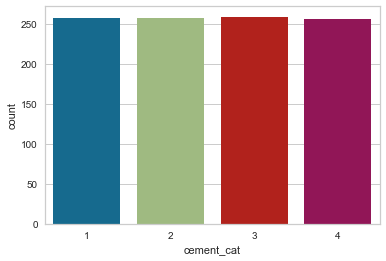

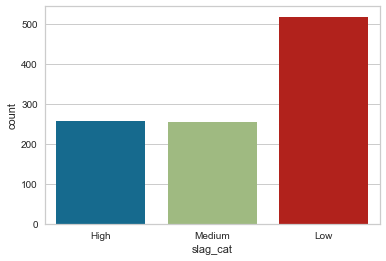

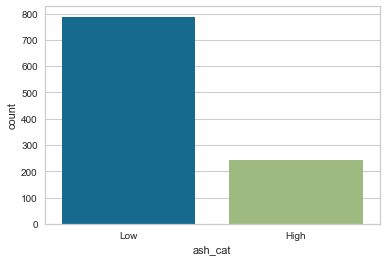

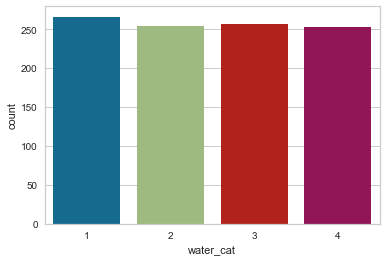

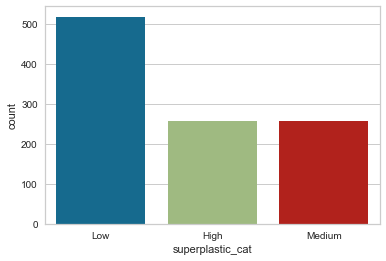

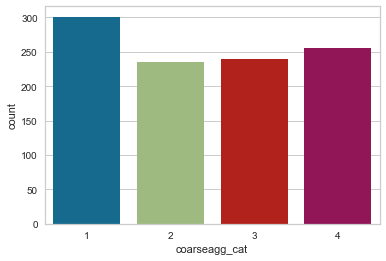

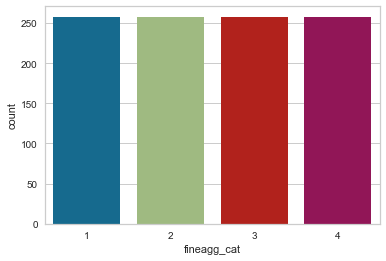

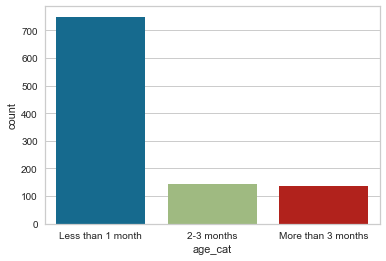

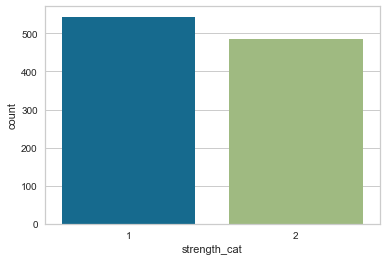

In [424]:
for i in ['cement_cat', 'slag_cat', 'ash_cat', 'water_cat', 'superplastic_cat', 'coarseagg_cat', 'fineagg_cat', 'age_cat', 'strength_cat']:
    sns.countplot(d1[i])
    plt.show()

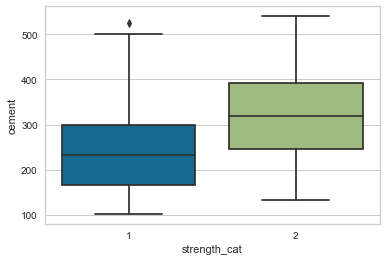

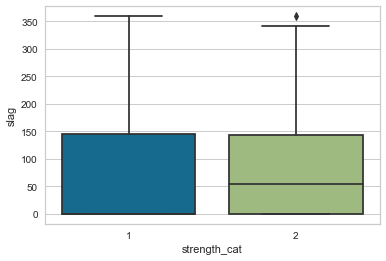

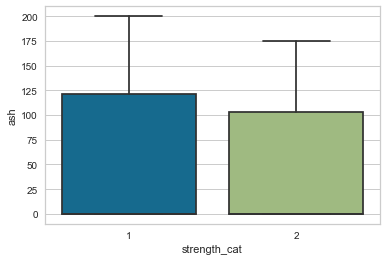

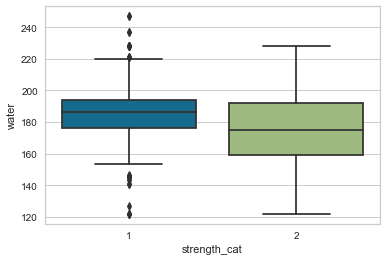

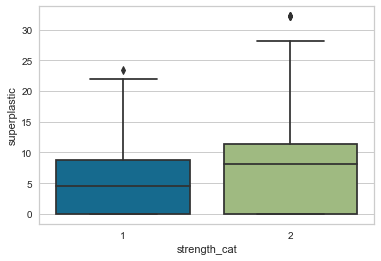

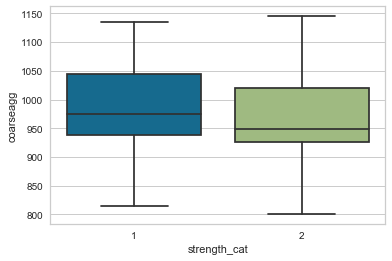

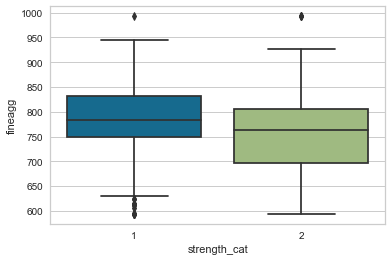

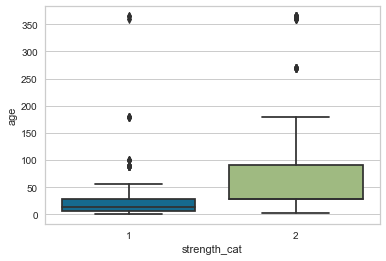

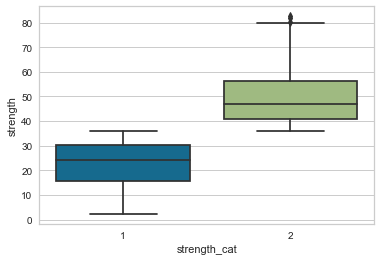

In [425]:
for i in ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.boxplot(x = 'strength_cat', y =i, data = d1)
    plt.show()

### Outlier Treatment

In [426]:
arr = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
for i in arr:
    q1, q2, q3 = d1[i].quantile([0.25, 0.5, 0.75])
    IQR = q3 - q1
    lower_cap = q1 - 1.5*IQR
    upper_cap = q3 + 1.5*IQR
    d1[i] = d1[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x))

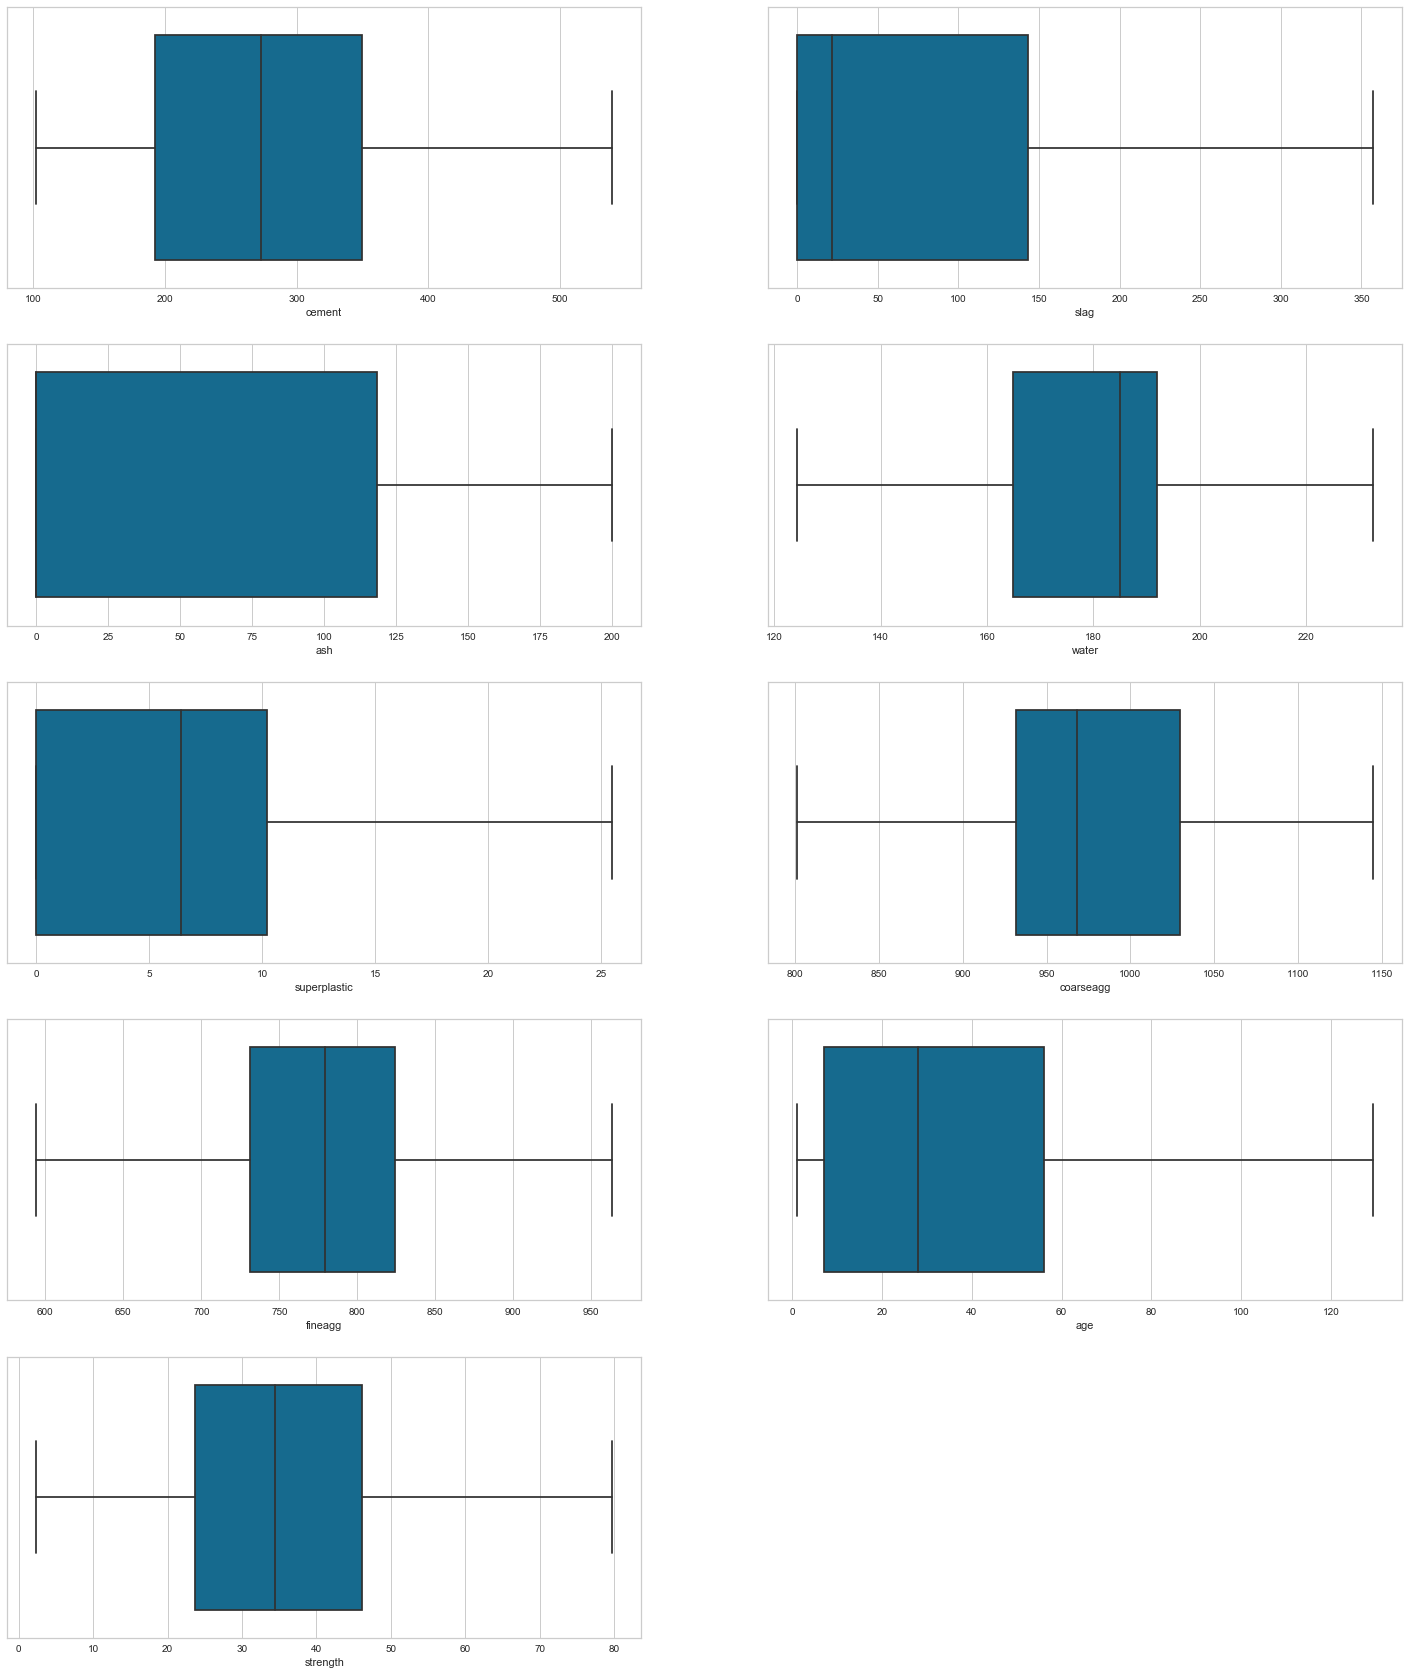

In [427]:
arr = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

plt.figure(figsize = (25,30))
pos = 1
for i in arr:
    plt.subplot(5,2,pos)
    sns.boxplot(d1[i])
    pos +=1

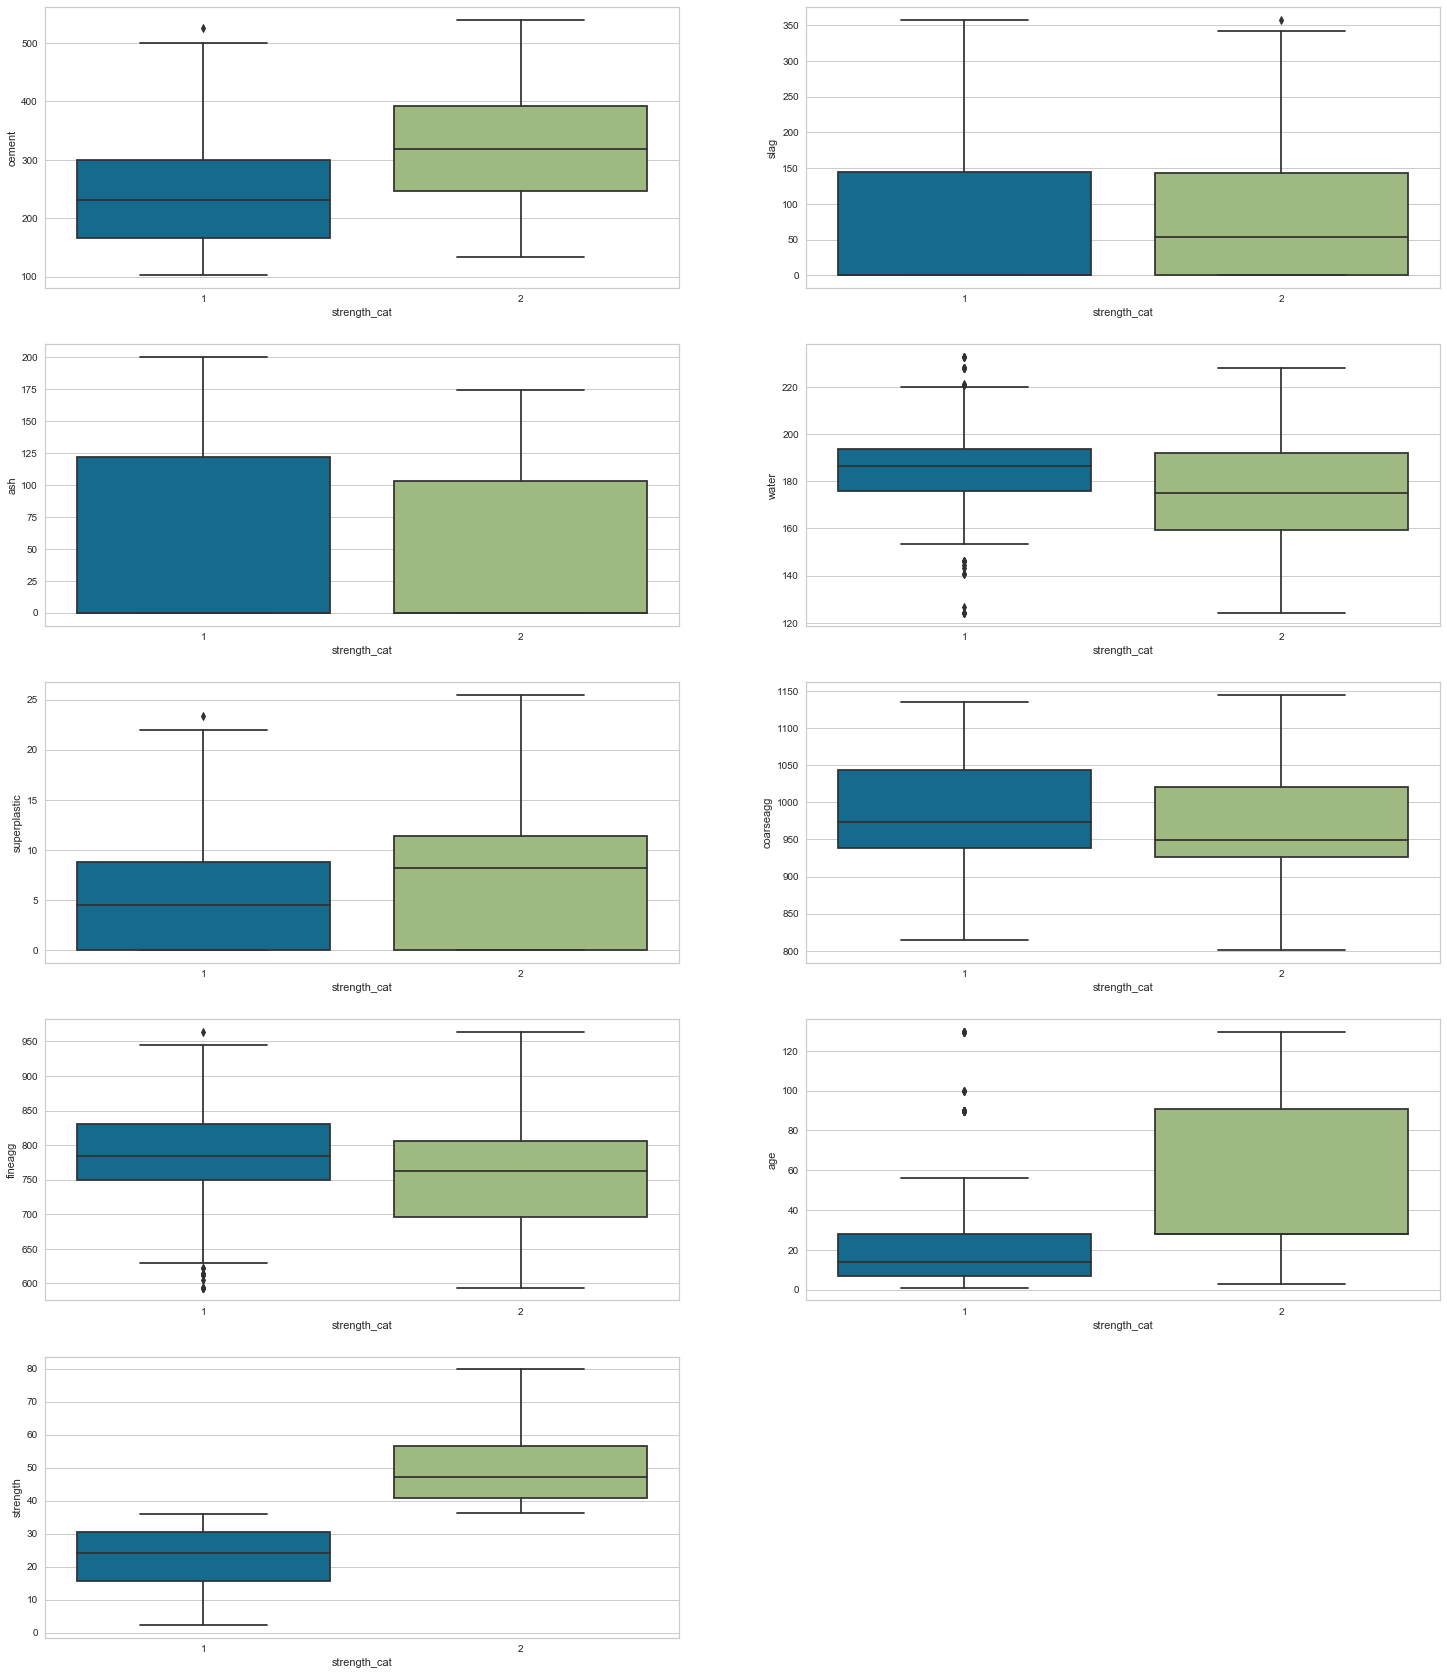

In [428]:
plt.figure(figsize = (25,30))
pos = 1
for i in arr:
    plt.subplot(5,2,pos)
    sns.boxplot(x = 'strength_cat', y =i, data = d1)
    pos +=1

#### Spliting the data

In [429]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

print(X.shape, y.shape)

(1030, 8) (1030,)


In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


#### The following models were applied on the dataset: 

    1. Linear Regression
    2. Polynomial Regression
    3. Logistic Regression
    4. Decission Tree Classifier
    5. Random Forest Classifier
    6. Ada Boost Classifier
    7. Gradient Boost Classifier
    8. K-Nearest Neighbor Classifier

The KFold and Gridsearch Cross Validation is applied for Decision Tree, Random Forest and K-nearest neighbor classifier. 

### Linear Regression

In [431]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {:2f}".format(col_name, lin_model.coef_[idx]))

intercept = lin_model.intercept_
print("The intercept for model is %.4f" % intercept)

lin_train_acc = lin_model.score(X_train, y_train).round(4)
lin_val_acc = lin_model.score(X_val, y_val).round(4)
lin_test_acc = lin_model.score(X_test, y_test).round(4)

print()
print('Score on Training set: %.4f' % (lin_train_acc*100))
print('Score on Validation set: %.4f' % (lin_val_acc*100))
print('Score on Test set: %.4f' % (lin_test_acc*100))

The coefficient for cement is 0.001969
The coefficient for slag is 0.001482
The coefficient for ash is 0.000707
The coefficient for water is -0.005059
The coefficient for superplastic is 0.007100
The coefficient for coarseagg is 0.000010
The coefficient for fineagg is -0.000645
The coefficient for age is 0.007049
The intercept for model is 1.8769

Score on Training set: 49.2800
Score on Validation set: 49.4400
Score on Test set: 51.9600


In [432]:
#Store the accuracy results for each model in a dataframe for final comparison

results2Df = pd.DataFrame({'Method':['Linear Regression'], 'Training Accuracy': lin_train_acc, 
                          'Validation Accuracy': lin_val_acc, 'Test Accuracy':lin_test_acc})

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.52


### Polynomial Regression

In [433]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
X_val2 = poly.fit_transform(X_val)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

poly_train_acc = poly_clf.score(X_train2, y_train).round(4)
poly_val_acc = poly_clf.score(X_val2, y_val).round(4)
poly_test_acc = poly_clf.score(X_test2, y_test).round(4)


print('Score on training set: ', (poly_train_acc*100))
print('Score on validation set: ',(poly_val_acc*100))
print('Score on test set: ',(poly_test_acc*100))

Score on training set:  49.07
Score on validation set:  23.86
Score on test set:  39.93


#### `With higher order polynomial regression, the accuracy score is decreasing so the linear model should be kept simple.`

In [434]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Polynomial Linear Regression'], 'Training Accuracy': poly_train_acc, 
                          'Validation Accuracy': poly_val_acc, 'Test Accuracy':poly_test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399


### Logitic Regression

In [435]:
model_log = LogisticRegression(random_state=7)

model_log.fit(X_train, y_train)

y_predict_log = model_log.predict(X_test)  

train_score = model_log.score(X_train,y_train)
val_score = model_log.score(X_val, y_val)
test_score = model_log.score(X_test, y_test)

print(train_score, val_score, test_score)

0.8518518518518519 0.8232044198895028 0.86084142394822


In [436]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Training Accuracy': train_score, 
                          'Validation Accuracy': val_score, 'Test Accuracy':test_score})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861


### Decision Tree Classifier

In [437]:
dt_model = DecisionTreeClassifier(random_state = 7)

dt_model.fit(X_train, y_train)    

train_acc = dt_model.score(X_train, y_train).round(4) 
val_acc = dt_model.score(X_val, y_val).round(4)
test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, val_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9981 0.8122 0.8641
Total Nodes: 139
Depth: 13
Total Leaves: 70



#### The model is over-fit to the training data set and needs pruning to limit it. 

In [438]:
## Checking the feature importances
feature_cols = X_train.columns

feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dt_model.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')

feat_imp.sort_values(by=0, ascending=False)

,0
age,0.351894
cement,0.235588
water,0.138744
fineagg,0.101606
slag,0.062399
superplastic,0.055713
coarseagg,0.045690
ash,0.008367


#### `All the attributes have importance in the model.`

In [439]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864


#### Spliting the data

In [440]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


### Kfold Cross Validation 

In [441]:
# 4 splits give each fold a 25% of data which is taken for validation
kfold_dt = KFold(n_splits = 4, random_state = 7, shuffle=True) 

results_dt = cross_val_score(dt_model, X_train, y_train, cv=kfold_dt)

results_test_dt = cross_val_score(dt_model, X_test, y_test, cv=kfold_dt)

print(results_dt)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_dt.mean()*100.0, results_dt.std()*100.0))
print()
print(results_test_dt)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_dt.mean()*100.0, results_test_dt.std()*100.0))

[0.8121547  0.83888889 0.90555556 0.86666667]

Training Accuracy Mean: 85.582% Standard Deviation:(3.459%)

[0.74358974 0.84415584 0.75324675 0.79220779]

Testing Accuracy Mean: 78.330% Standard Deviation:(3.957%)


In [442]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier-KFold'], 'Training Accuracy': results_dt.mean(),
                              'Test Accuracy': results_test_dt.mean()})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783


### Grid Search

In [443]:
dt_model.get_params() # getting the decissiontree classifier model paramters

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 7,
 'splitter': 'best'}

In [444]:
# giving the model parameters the values for trials:
param_grid = {'criterion': ('gini','entropy'),'splitter': ('best','random'),
              'max_depth':(1,3,6,8,10,14),'max_leaf_nodes':(50,75,100,150,200,250)}

In [445]:
# 4 splits give each fold a 25% of data which is taken for validation

split = 4 

gs = GridSearchCV(dt_model, param_grid, cv = split)

gs.fit(X_train,y_train)

print('The best parameter configuration is:', gs.best_params_)
print('The best score:',gs.best_score_)

The best parameter configuration is: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 100, 'splitter': 'random'}
The best score: 0.8626841620626151


#### Training dataset accuracy is 86.268% with best parameter configuration as: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 100, 'splitter': 'random'}

In [446]:
dt_model = DecisionTreeClassifier(random_state = 7, criterion = 'entropy', max_depth = 10, max_leaf_nodes = 100,
                                  splitter = 'random')
    
dt_model.fit(X_train, y_train)

train_acc = dt_model.score(X_train, y_train).round(4) 

test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9639 0.877
Total Nodes: 199
Depth: 10
Total Leaves: 100



In [447]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier after GridSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877


### Randomized Search 

In [448]:
# giving the model parameters the values for trials:

param_dist = {'criterion': ('gini','entropy'),
              'splitter': ('best','random'),
              'max_depth':(1,3,6,8,10,14),
              'max_leaf_nodes':(50,75,100,150,200,250)}

In [449]:
dt_model = DecisionTreeClassifier()

randomCV = RandomizedSearchCV(dt_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print('The best parameters are: ',randomCV.best_params_)

print('The best score: ',randomCV.best_score_)

The best parameters are:  {'splitter': 'random', 'max_leaf_nodes': 100, 'max_depth': 14, 'criterion': 'gini'}
The best score:  0.8613122605363983


In [450]:
dt_model = DecisionTreeClassifier(random_state = 7, criterion = 'gini', max_depth = 14, max_leaf_nodes = 50,
                                  splitter = 'best')
dt_model.fit(X_train, y_train)

train_acc = dt_model.score(X_train, y_train).round(4) 

test_acc = dt_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())
print()

0.9681 0.8706
Total Nodes: 99
Depth: 9
Total Leaves: 50



In [451]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['DT Classifier after RandomizedSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871


### Random Forest Classifier

#### Spliting the data

In [452]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [453]:
RFC_model = RandomForestClassifier(random_state=7)

RFC_model.fit(X_train, y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

val_acc = RFC_model.score(X_val, y_val).round(4)

test_acc = RFC_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.9981
Validation set score: 0.8674
Test set score: 0.8900


In [454]:
## Checking the feature importances
feature_cols = X_train.columns

feat_importance = RFC_model.feature_importances_

feat_imp_dict = dict(zip(feature_cols, RFC_model.feature_importances_))

feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')

feat_imp.sort_values(by=0, ascending=False)

,0
age,0.339503
cement,0.170233
water,0.131039
fineagg,0.103714
coarseagg,0.075139
superplastic,0.071048
ash,0.055789
slag,0.053535


In [455]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890


### Kfold Cross Validation 

#### Spliting the data

In [456]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [457]:
num = 4
seed = 7

kfold_RFC = KFold(n_splits=num, random_state=seed, shuffle=True)

results_RFC = cross_val_score(RFC_model, X_train, y_train, cv=kfold_RFC)

results_test_RFC = cross_val_score(RFC_model, X_test, y_test, cv=kfold_RFC)


print(results_RFC)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_RFC.mean()*100.0, results_RFC.std()*100.0))
print()
print(results_test_RFC)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_RFC.mean()*100.0, results_test_RFC.std()*100.0))

[0.87845304 0.88888889 0.9        0.9       ]

Training Accuracy Mean: 89.184% Standard Deviation:(0.896%)

[0.75641026 0.90909091 0.83116883 0.79220779]

Testing Accuracy Mean: 82.222% Standard Deviation:(5.670%)


In [458]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier-KFold'], 'Training Accuracy': results_RFC.mean(),
                             'Test Accuracy': results_test_RFC.mean()})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822


### Grid Search

In [459]:
RFC_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [460]:
param_grid = {'n_estimators': (50,100,150,200),'max_depth': (10,20),'max_features': (6, 8), 'criterion':('gini','entropy')}

In [461]:
gs = GridSearchCV(RFC_model, param_grid, cv = 4)

gs.fit(X_train,y_train)

print('The best parameter configuration is: ', gs.best_params_)
print('The best score: ',gs.best_score_)

The best parameter configuration is:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'n_estimators': 100}
The best score:  0.8945672191528545


#### Highest accuracy is 89.457% with best parameters configuration as:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'n_estimators': 100}

In [462]:
RFC_model = RandomForestClassifier(random_state = 7, criterion = 'entropy', max_depth = 10, max_features = 6, n_estimators = 100) 
    
RFC_model.fit(X_train, y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

test_acc = RFC_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  

print("Test set score: %.4f" % test_acc)

Train set score: 0.9972
Test set score: 0.9029


In [463]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Random Forest Classifier - GridSearch'], 'Training Accuracy': train_acc, 
                           'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### Randomized Search 

In [464]:
# giving the model parameters the values for trials:

param_dist = {'n_estimators': (50,100,150,200),
              'max_depth': (10,20),
              'max_features': (6, 8),
              'criterion':('gini','entropy'),
              'class_weight':('balanced','balanced_subsample')}

In [465]:
RFC_model = RandomForestClassifier()

randomCV = RandomizedSearchCV(RFC_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print(randomCV.best_params_)

print('The best score: ',randomCV.best_score_)

{'n_estimators': 100, 'max_features': 6, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}
The best score:  0.9001436781609196


In [466]:
RFC_model = RandomForestClassifier(random_state = 7, criterion = 'entropy', max_depth = 20, max_features = 6, 
                                   n_estimators = 50, class_weight = 'balanced_subsample')
    
RFC_model.fit(X_train,y_train)

train_acc = RFC_model.score(X_train, y_train).round(4) 

test_acc = RFC_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

treeObj = dt_model.tree_
    
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())

0.9972 0.9061
Total Nodes: 99
Depth: 9
Total Leaves: 50


In [467]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['RandomForestClassifier - RandomizedSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### AdaBoost

#### Spliting the data

In [468]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (540, 8) (540,)
Dimensions of Validation dataset:  (181, 8) (181,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [469]:
AD_model = AdaBoostClassifier(random_state=7)

AD_model.fit(X_train, y_train)

train_acc = AD_model.score(X_train, y_train).round(4) 
val_acc = AD_model.score(X_val, y_val).round(4)
test_acc = AD_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.9426
Validation set score: 0.8453
Test set score: 0.8997


In [470]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['AdaBoost Classifier'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})
results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### Gradient Boosting

In [471]:
GB_model = GradientBoostingClassifier(random_state=7)

GB_model.fit(X_train, y_train)

train_acc = GB_model.score(X_train, y_train).round(4) 
val_acc = GB_model.score(X_val, y_val).round(4)
test_acc = GB_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.9944
Validation set score: 0.8674
Test set score: 0.8738


In [472]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['Gradient Boosting'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### K-Nearest Neighbors

In [473]:
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

train_acc = knn_model.score(X_train, y_train).round(4) 
val_acc = knn_model.score(X_val, y_val).round(4)
test_acc = knn_model.score(X_test, y_test).round(4)

print("Train set score: %.4f" % train_acc)  
print("Validation set score: %.4f" % val_acc)
print("Test set score: %.4f" % test_acc)

Train set score: 0.8759
Validation set score: 0.8177
Test set score: 0.8220


In [474]:
tempresultsDf = pd.DataFrame({'Method':['KNN'], 'Training Accuracy': train_acc, 
                          'Validation Accuracy': val_acc, 'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### Kfold Cross Validation 

#### Spliting the data

In [475]:
d2 = d1.copy()
d2 = d2.drop(d1.columns[9:17],axis = 1)

X = d2.iloc[:,0:8]
y = d2['strength_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=7)

print('Dimensions of Training dataset: ', X_train.shape, y_train.shape)
# print('Dimensions of Validation dataset: ', X_val.shape, y_val.shape)
print('Dimensions of Testing dataset: ', X_test.shape,  y_test.shape)

Dimensions of Training dataset:  (721, 8) (721,)
Dimensions of Testing dataset:  (309, 8) (309,)


In [476]:
num = 4
seed = 7

kfold_knn = KFold(n_splits = num, random_state = seed, shuffle=True)

results_knn = cross_val_score(knn_model, X_train, y_train, cv = kfold_knn)

results_test_knn = cross_val_score(knn_model, X_test, y_test, cv = kfold_knn)

print(results_knn)
print("\nTraining Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_knn.mean()*100.0, results_knn.std()*100.0))
print()
print(results_test_knn)
print("\nTesting Accuracy Mean: %.3f%% Standard Deviation:(%.3f%%)" % (results_test_knn.mean()*100.0, results_test_knn.std()*100.0))

[0.8121547  0.78333333 0.81666667 0.84444444]

Training Accuracy Mean: 81.415% Standard Deviation:(2.167%)

[0.71794872 0.83116883 0.83116883 0.79220779]

Testing Accuracy Mean: 79.312% Standard Deviation:(4.622%)


In [477]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN-KFold'], 'Training Accuracy': results_knn.mean(),
                              'Test Accuracy': results_test_knn.mean()})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### Grid Search

In [478]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [479]:
param_grid = {'n_neighbors': list(range(1,9)),
              'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [480]:
gs = GridSearchCV(knn_model, param_grid, cv = 4)

gs.fit(X_train,y_train)

print('The best parameter configuration is: ', gs.best_params_)
print('The best score: ',gs.best_score_)

The best parameter configuration is:  {'algorithm': 'ball_tree', 'n_neighbors': 1}
The best score:  0.8224677716390423


#### Highest accuracy is 82.247% with best parameters configuration as: {'algorithm': 'ball_tree', 'n_neighbors': 1}

In [481]:
knn_model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'ball_tree') 
                                   
knn_model.fit(X_train, y_train)
  
train_acc = knn_model.score(X_train, y_train).round(4) 

test_acc = knn_model.score(X_test, y_test).round(4)


print("Train set score: %.4f" % train_acc)  
print("Test set score: %.4f" % test_acc)

Train set score: 0.9958
Test set score: 0.8544


In [482]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN - GridSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


### Randomized Search 

In [483]:
# giving the model parameters the values for trials:
param_dist = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [484]:
knn_model = KNeighborsClassifier()

randomCV = RandomizedSearchCV(knn_model, param_dist, n_iter = 10)

randomCV.fit(X_train,y_train)

print(randomCV.best_params_)

print('The best score: ',randomCV.best_score_)

{'n_neighbors': 1, 'algorithm': 'kd_tree'}
The best score:  0.8446839080459769


In [485]:
knn_model = KNeighborsClassifier(n_neighbors = 1, algorithm = 'kd_tree')

knn_model.fit(X_train, y_train)
    
train_acc = knn_model.score(X_train, y_train).round(4) 

test_acc = knn_model.score(X_test, y_test).round(4)

print(train_acc, test_acc)

0.9958 0.8544


In [486]:
#Store the accuracy results for each model in a dataframe for final comparison

tempresultsDf = pd.DataFrame({'Method':['KNN - RandomizedSearch'], 'Training Accuracy': train_acc, 
                          'Test Accuracy':test_acc})

results2Df = pd.concat([results2Df, tempresultsDf])

results2Df = results2Df[['Method', 'Training Accuracy', 'Validation Accuracy', 'Test Accuracy']]

results2Df.round(3)

,Method,Training Accuracy,Validation Accuracy,Test Accuracy
0,Linear Regression,0.493,0.494,0.520
0,Polynomial Linear Regression,0.491,0.239,0.399
0,Logistic Regression,0.852,0.823,0.861
0,DT Classifier,0.998,0.812,0.864
0,DT Classifier-KFold,0.856,NaN,0.783
0,DT Classifier after GridSearch,0.964,NaN,0.877
0,DT Classifier after RandomizedSearch,0.968,NaN,0.871
0,Random Forest Classifier,0.998,0.867,0.890
0,Random Forest Classifier-KFold,0.892,NaN,0.822
0,Random Forest Classifier - GridSearch,0.997,NaN,0.903


## By binning the strength in 2 categories, the accuracy scores are observed higher. 

## Suggested model to use for the prediction of the strength would be to use the RandomForestClassifier model with a testing accuracy of 89% which further developed using RandomizedSearch CV leads to an increased testing accuracy of 90.6%